<a href="https://colab.research.google.com/github/h-h0304/2024S-Ajou-ML/blob/main/HW2_202022301_%EC%A0%84%ED%99%98%ED%9C%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제1. Linear SVM vs Kernel SVM

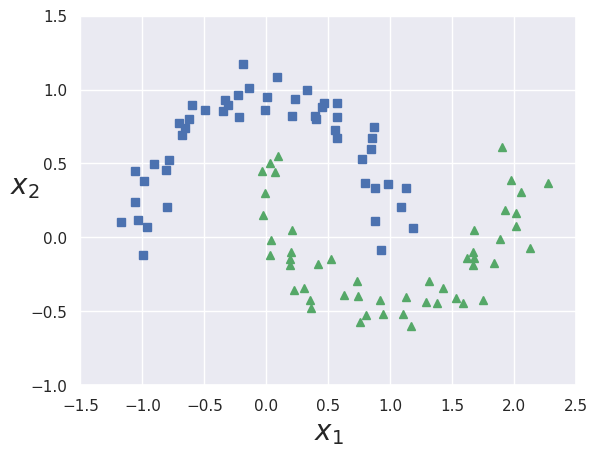

In [35]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

#Toy example 생성
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [36]:
# decision boundary 시각화
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

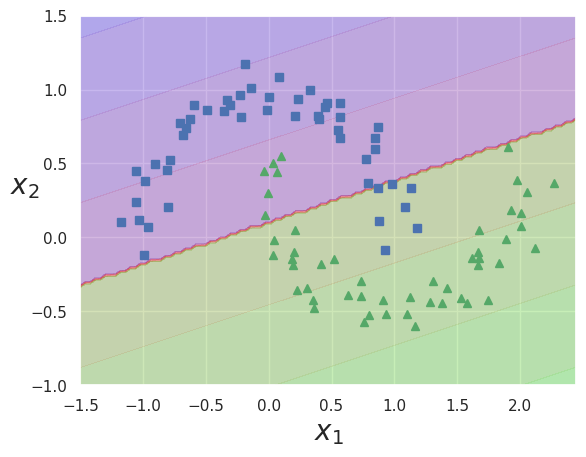

In [37]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(C=1)
linear_svc.fit(X,y)
plot_predictions(linear_svc, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 문제 1-1 Kernel SVM 학습

Kernel SVM을 아래의 조건에 맞게 학습하고 시각화를 진행하시오.

\

---
*조건*

 1. `rbf` Kernel을 사용하여 주어진 X를 `100% 정확도`로 예측하는 하이퍼파라미터를 찾으시오.
 2. `Linear SVM`과 `Kernel SVM`의 decision boundary를 시각화하시오.
 3. subplot을 활용하여 기존 `Linear SVM`와 비교할 수 있도록 시각화하시오.
 ---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

Best Parameters: {'C': 1, 'gamma': 10}
Accuracy: 1.0
정확도 100%에 도달했습니다.


Text(0.5, 1.0, 'Kernel SVM (RBF)')

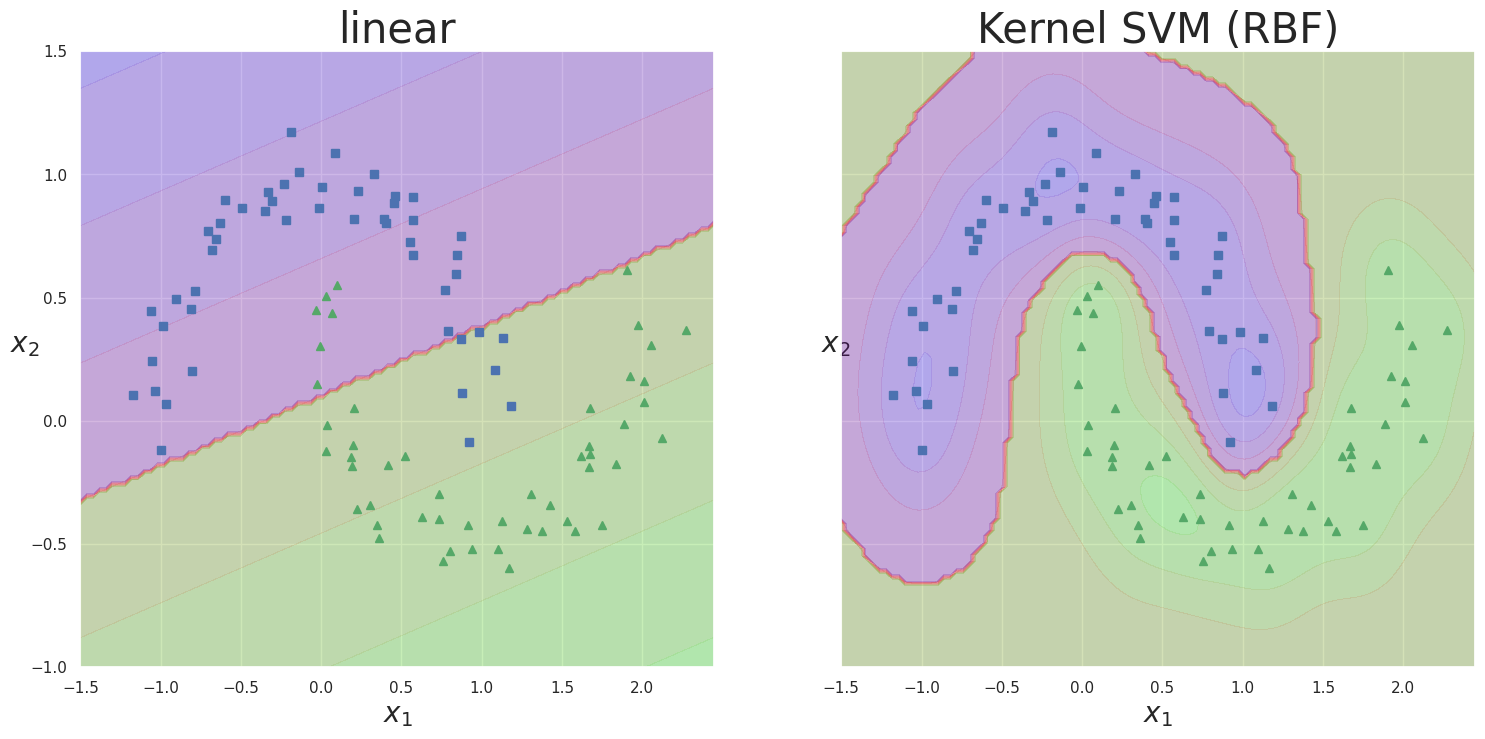

In [39]:
from sklearn.svm import SVC

# 하이퍼파라미터 그리드 정의
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), sharex=True, sharey=True)

plt.sca(axes[0])
plot_predictions(linear_svc, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title("linear", fontsize=30)

#####################문제1-1###############################
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 조합 탐색
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X, y)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델 추출
best_svc = grid_search.best_estimator_

# 최적의 모델을 사용하여 데이터셋을 학습
best_svc.fit(X, y)

# 최적의 모델을 사용하여 예측 수행
y_pred = best_svc.predict(X)

# 정확도 계산
accuracy = accuracy_score(y, y_pred)

print("Accuracy:", accuracy)

# 정확도가 100%인지 확인
if accuracy == 1.0:
    print("정확도 100%에 도달했습니다.")
else:
    print("정확도 100%에 도달하지 못했습니다.")

# 시각화
plt.sca(axes[1])
plot_predictions(best_svc, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title("Kernel SVM (RBF)", fontsize=30)
##########################

# 문제 1-2 Kernel SVM의 장점

* **해당 데이터에서 Linear SVM보다 Kernel SVM이 잘 동작할 수 있는 이유를 서술하시오.**
* **데이터의 분포와 모델의 특징을 연결지어서 설명하시오.**

**정답** :

Kernel SVM의 장점은 비선형적인 데이터셋에서 더욱 강력한 성능을 발휘할 수 있다는 것입니다. 이는 Kernel SVM이 데이터를 고차원 특징 공간으로 매핑하여 선형적으로 분리되는 결정 경계를 찾을 수 있기 때문입니다. 다시 말해 복잡하게 겹쳐져 있는 dataset을 우리가 깔끔하게 분할하기 위해서는 차원을 바꾸어주는 작업이 필요한데 SVM은 Kernel을 통해 기존의 1차원 상에 있는 점들을 2차원으로 바꾸거나 2차원 평면에 있는 점들을 3차원으로 바꿔주기도 합니다. 이렇게 단순히 저차원에 있는 갑슬 고차원의 형태로 변환해주거나 이것을 넘어 무한 차원까지 값을 변화시켜 깔끔하게 경계선을 찾을 수 있도록 기존의 데이터를 변환해줍니다.

해당 데이터에서는 Linear SVM보다 Kernel SVM이 더 잘 동작할 수 있는 이유는 데이터가 선형적으로 분리되지 않는 비선형적인 패턴을 가지고 있기 때문입니다. 초승달 두 개가 겹쳐진 모양의 데이터셋은 선형 경계로 완벽하게 분리할 수 없으므로, Kernel SVM이 비선형 매핑을 통해 데이터를 고차원 특징 공간으로 변환하여 복잡한 패턴을 학습할 수 있습니다. 이렇게 하면 Kernel SVM이 더 유연하게 데이터를 분류할 수 있으며, 따라서 더 높은 성능을 발휘할 수 있습니다.

## 데이터 코드

# 문제 2. Validation

- `Test set` **<font color=red> 은 문제 2-3에서만 사용해야 합니다. </font>**

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split

# dir을 바꿔주세요.
# digits_clean 데이터를 사용해야 합니다.

data = pd.read_csv('./drive/MyDrive/Colab Notebooks/HW2/digits_clean.csv').to_numpy()
labels = pd.read_csv('./drive/MyDrive/Colab Notebooks/HW2/digits_target.csv').to_numpy().reshape(-1)
train_X, test_X, train_y, test_y = train_test_split(data, labels, test_size= 0.2, random_state = 12)

## 문제 2-1

 - 아래 코드의 방식으로 평가 시 발생하는 문제를 서술하시오.
 - `Model fitting` 관점에서 서술
 - Validation set의 목적

In [41]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=100, C=100)
rbf_kernel_svm_clf.fit(train_X, train_y)
X_val, y_val = train_X, train_y
print(f"Validation score : {rbf_kernel_svm_clf.score(X_val, y_val)}")

Validation score : 1.0


#### 정답 :
제시된 코드에서는 SVM 모델을 RBF 커널로 설정하고, gamma와 C 값을 각각 100으로 설정하여 학습시키고 있습니다. 그러나, 모델 평가 과정에서 중요한 문제가 있습니다. X_val과 y_val이라는 변수는 사실상 학습 데이터인 train_X와 train_y로 설정되어 있어, 학습 데이터를 검증 데이터로 사용하고 있습니다. 이러한 접근 방식은 모델 적합과 일반화 능력을 평가하는 데 있어 몇 가지 심각한 오류를 야기합니다.

첫째, 과적합(Overfitting)의 위험을 간과합니다. 모델이 훈련 데이터에 너무 잘 맞추어져 있어서, 실제로는 데이터의 일반적인 특성보다는 훈련 데이터의 특수한 특성이나 잡음에 대해 학습할 수 있습니다. 이 경우, 모델은 훈련 데이터에 대해서는 높은 성능을 보이겠지만, 새로운 데이터에 대해서는 그 성능이 크게 떨어질 수 있습니다.

둘째, 검증 세트(Validation set)의 목적을 무시합니다. 검증 세트의 주요한 역할은 모델이 훈련 과정에서 보지 못한 데이터에 대해 얼마나 잘 일반화되는지를 평가하는 것입니다. 따라서 검증 세트는 모델의 하이퍼파라미터를 조정하는 데 중요한 역할을 하며, 이를 통해 모델이 실제 세계의 데이터에 대해 좋은 성능을 발휘할 수 있는지를 확인할 수 있습니다. 그러나 학습 데이터를 검증 데이터로 사용하는 경우, 모델이 실제로 얼마나 잘 작동할지에 대한 정확한 평가가 불가능합니다.

셋째, 일반화 능력 평가의 부족입니다. 모델의 성능을 올바르게 평가하기 위해서는 모델이 학습하지 않은 새로운 데이터에 대한 예측 성능을 확인해야 합니다. 일반적으로 이를 위해 훈련 세트와 별개로 설정된 테스트 세트를 사용합니다. 하지만 학습 데이터를 검증 데이터로 사용하는 경우, 모델이 새로운 데이터에 대해 얼마나 잘 예측할 수 있는지를 알 수 없게 됩니다.

이러한 문제들을 해결하기 위해서는 훈련 세트, 검증 세트, 테스트 세트를 명확하게 구분하여 사용해야 합니다. 훈련 세트로 모델을 학습시키고, 검증 세트로 모델의 하이퍼파라미터를 조정 및 성능을 평가한 후, 최종적으로 테스트 세트를 사용하여 모델의 일반화 능력을 평가해야 합니다. 이러한 과정을 통해 모델이 실제 환경에서도 잘 작동할 수 있음을 보다 정확하게 평가할 수 있습니다.

##문제 2-2 K-fold Cross validation

5-fold Cross Validation (CV) 을 사용하여 모델을 평가하시오.

\

---
*조건*
1. **<font color=red>* cross_val_score 함수를 사용하지 마세요. </font>**
2. Cross validation score의 분산과 평균을 출력하시오.
3. Cross validation score(Accuracy)가 0.8 이상인 Hyperparameter를 찾고 전체 train set으로 학습하시오.
4. `Test set`에 대해서 `문제 2-1`에서 학습한 모델과 최종 성능에 대해서 비교하시오 (출력만 하시면 됩니다).

---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.


In [42]:
from sklearn.model_selection import KFold


#####################문제2-2###############################
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_csv('./drive/MyDrive/Colab Notebooks/HW2/digits_clean.csv').to_numpy()
labels = pd.read_csv('./drive/MyDrive/Colab Notebooks/HW2/digits_target.csv').to_numpy().reshape(-1)
# 데이터를 훈련 및 테스트 세트로 분할
X, y = data, labels
train_X, test_X, train_y, test_y = train_test_split(data, labels, test_size= 0.2, random_state = 12)

from sklearn.svm import SVC
import numpy as np

# 최적의 하이퍼파라미터를 찾는 부분

# gamma와 C 값 후보 리스트
gamma_values = [0.001, 0.01, 0.1, 1, 10, 100]
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# 초기화된 최적의 하이퍼파라미터와 정확도
best_gamma = None
best_C = None
best_mean_score = 0

# Cross Validation을 위한 KFold 객체 생성
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


# 각각의 gamma와 C 값에 대해 실험
for gamma in gamma_values:
    for C in C_values:
        # SVM 모델 생성
        svm_clf = SVC(kernel='rbf', gamma=gamma, C=C)

        # Cross Validation Score 계산을 위한 빈 리스트 생성
        scores = []

        # 각 Fold에 대해 모델을 학습하고 평가
        for train_index, val_index in kfold.split(X):
            X_train_fold, X_val_fold = X[train_index], X[val_index]
            y_train_fold, y_val_fold = y[train_index], y[val_index]

            # 모델 학습
            svm_clf.fit(X_train_fold, y_train_fold)

            # 모델 평가 및 점수 저장
            score = svm_clf.score(X_val_fold, y_val_fold)
            scores.append(score)

        # Cross Validation Score의 평균 계산
        mean_score = np.mean(scores)

        # 현재 하이퍼파라미터 조합의 Cross validation score(Accuracy)가 더 높은지 확인
        if mean_score > best_mean_score:
            best_mean_score = mean_score
            best_gamma = gamma
            best_C = C

if best_mean_score >= 0.8:
    # 최적의 하이퍼파라미터를 사용하여 전체 train set으로 SVM 모델 생성 및 학습
    final_svm = SVC(kernel='rbf', gamma=best_gamma, C=best_C)
    final_svm.fit(train_X, train_y)
    print(f"최적의 하이퍼파라미터: gamma = {best_gamma}, C = {best_C}")
else:
    print("교차 검증 점수가 0.8 이상인 하이퍼파라미터를 찾지 못했습니다.")

# 최적의 하이퍼파라미터를 사용하여 SVM 모델 생성
kernel_svm_clf = SVC(kernel='rbf', gamma=best_gamma, C=best_C)

# Cross Validation Score 계산을 위한 빈 리스트 생성
scores = []

# 각 Fold에 대해 모델을 학습하고 평가
for train_index, val_index in kfold.split(X):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # 모델 학습
    kernel_svm_clf.fit(X_train_fold, y_train_fold)

    # 모델 평가 및 점수 저장
    score = kernel_svm_clf.score(X_val_fold, y_val_fold)
    scores.append(score)

# Cross Validation Score의 평균과 분산 계산
mean_score = np.mean(scores)
variance_score = np.var(scores)

# 평균과 분산 출력
print(f"평균 : {mean_score}")
print(f"분산 : {variance_score}")

final_svm = kernel_svm_clf
#########################################################

print(f"final_model 정확도 : {final_svm.score(test_X,test_y)}")
print(f"2-1 model 정확도 : {rbf_kernel_svm_clf.score(test_X,test_y)}")

최적의 하이퍼파라미터: gamma = 0.001, C = 10
평균 : 0.9881799264421215
분산 : 1.73547645202131e-05
final_model 정확도 : 0.9965277777777778
2-1 model 정확도 : 0.1076388888888889


# 문제 2-3 Stratified K-fold Cross validation

위에서 찾은 하이퍼파라미터로 Stratified K-fold Cross validation을 진행하면서 각 fold의 test y(class)의 분포를 histplot(혹은 barplot) 시각화하세요.

\

---
*조건*

1. **<font color=red>* cross_val_score 함수를 사용하지 마세요. </font>**
2. fold 별 y 분포 그래프의 경우, 주어진 subplot을 활용하세요.
3. (Stratified) Cross validation score의 분산과 평균을 출력하시오.

---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [43]:
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

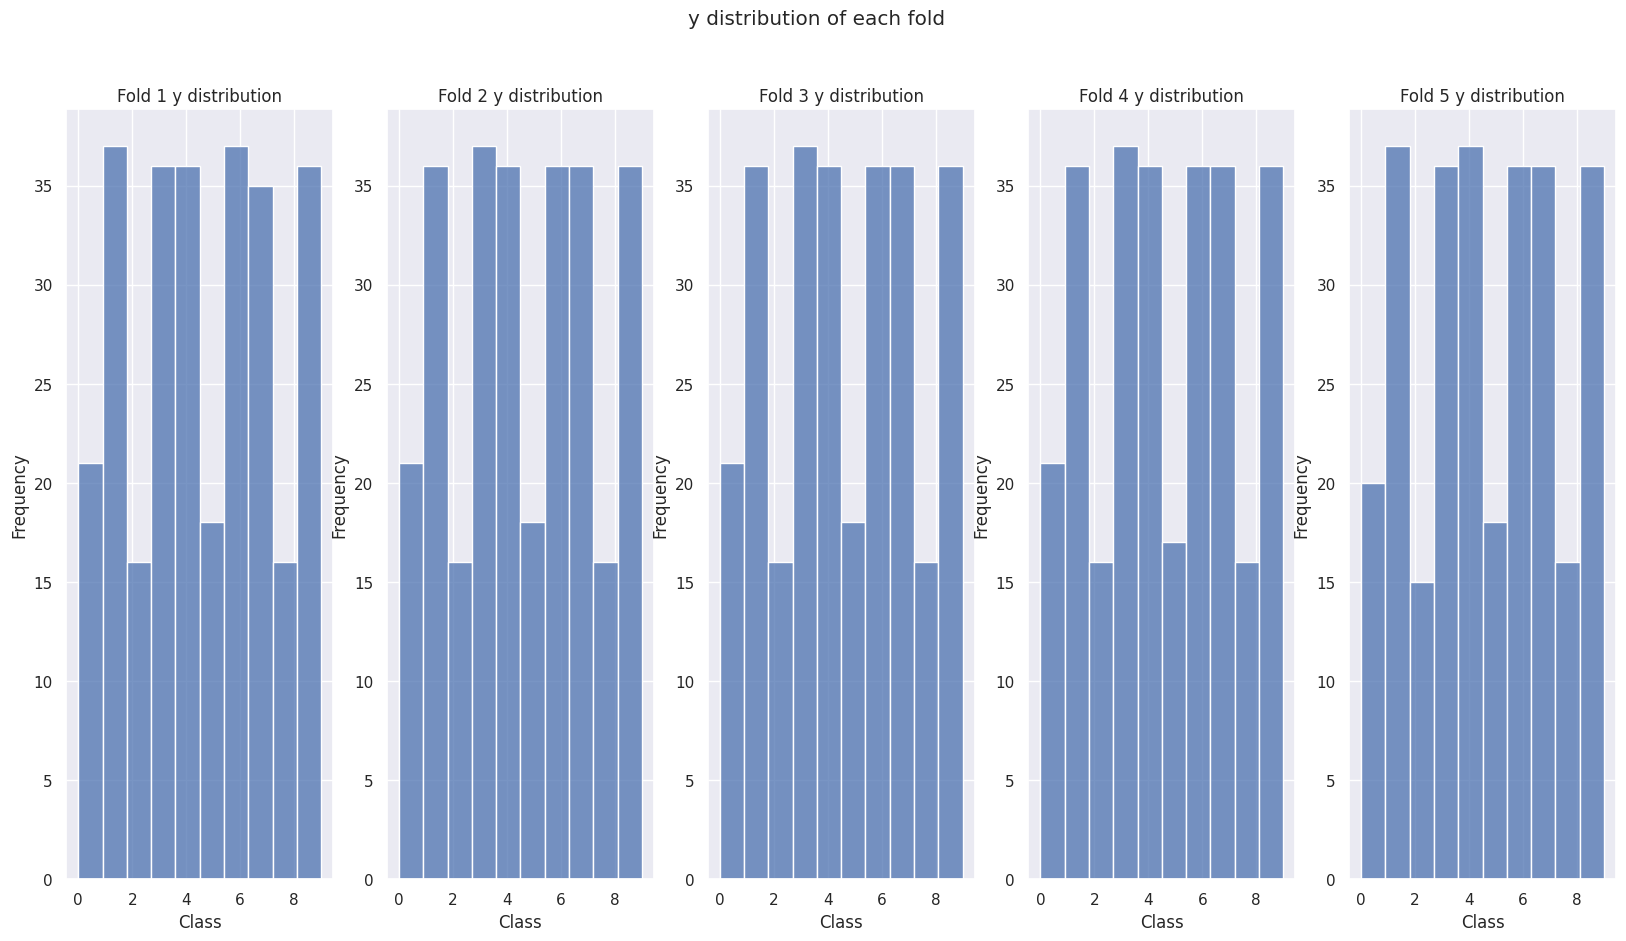

평균 : 0.9902656794425088
분산 : 2.1202566750586045e-05


In [44]:


#####################문제2-3###############################
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
import seaborn as sns
import numpy as np
import pandas as pd

# 데이터 로드
data = pd.read_csv('./drive/MyDrive/Colab Notebooks/HW2/digits_clean.csv').to_numpy()
labels = pd.read_csv('./drive/MyDrive/Colab Notebooks/HW2/digits_target.csv').to_numpy().reshape(-1)

# 하이퍼파라미터 설정
gamma = 0.001
C = 10

# StratifiedKFold 객체 생성
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# SVM 모델 생성
svm_clf = SVC(kernel='rbf', gamma=gamma, C=C)

scores = []  # 점수 저장을 위한 리스트

fig, axes = plt.subplots(1, 5, figsize=(20, 10))  # 시각화를 위한 subplot 준비

# Stratified K-fold Cross Validation 진행
for i, (train_index, test_index) in enumerate(stratified_kfold.split(data, labels)):
    X_train_fold, X_test_fold = data[train_index], data[test_index]
    y_train_fold, y_test_fold = labels[train_index], labels[test_index]

    # 모델 학습
    svm_clf.fit(X_train_fold, y_train_fold)

    # 모델 평가
    score = svm_clf.score(X_test_fold, y_test_fold)
    scores.append(score)

    # 각 fold의 test y(class)의 분포 시각화
    sns.histplot(y_test_fold, kde=False, ax=axes[i])
    axes[i].set_title(f'Fold {i+1} y distribution')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('Frequency')

plt.suptitle("y distribution of each fold")
plt.show()

# 평균과 분산 계산
mean_score = np.mean(scores)
variance_score = np.var(scores)

# 평균과 분산 출력
print(f"평균 : {mean_score}")
print(f"분산 : {variance_score}")

########################################################

# 문제 3. Grid search

- Scikit-learn 라이브러리를 이용하여 RandomForestClassifier의 최적의 파라미터를 찾는다.

- 아래 baseline 모델보다 높은 성능을 보이는 RandomForestClassifier 모델을 구축한다.

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# dir 바꾸시기 바랍니다.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HW2/Bank_clean.csv')


# 코드 건드리지 말 것
for i in df.columns: # label encoding
    if type(df[i].unique()[0]) == str :
      le = LabelEncoder()
      df[i] = le.fit_transform(df[i])

y = df['y']
X = df.drop(columns = 'y')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split dataset

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 코드 건드리지 말 것
clf = RandomForestClassifier(n_estimators = 10) # Baseline Model
score=cross_val_score(clf, X_train, y_train, cv=5)
print(f"baseline cross validation score : {score.mean()}")

baseline = clf.fit(X_train,y_train)

baseline cross validation score : 0.8454689984101748



### 문제 3-1
주어진 링크를 참고하여 변경가능한 hyperparameter를 `param_grid`에 추가하세요.

그리고 추가한 hyperparameter에 대해 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고, Accuracy 기반 가장 높은 성능을 보이는 best hyperparameter를 확인하세요.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

---
*조건*

- **<font color=red>* Baseline보다 validation score(ACC)가 높아야 합니다. (낮을 시 감점)</font>**
- **충분히 grid search를 진행하세요.**


---



* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.


In [47]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [48]:
##param_grid##를 추가하세요
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # 트리의 개수
    'max_depth': [None, 10, 20, 30],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 내부 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]  # 리프 노드에 있어야 하는 최소 샘플 수
}

In [49]:
clf = RandomForestClassifier(random_state=42) # 과제를 위해 random_state를 고정해두었습니다.


########################## 문제 3-1 ##########################
########################## 코드 작성 ##########################

# GridSearchCV를 사용하여 정의된 하이퍼파라미터 조합에 대해 교차 검증을 수행합니다.
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# 훈련 데이터에 대해 grid search를 수행합니다.
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 조합과 그때의 점수(성능)을 출력합니다.
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

############################################################

print(f"Best parameters: {best_parameters}")
print(f"Best score: {best_score}")

Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8599364069952304


### 문제 3-2
3-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 다음 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.



\

---
*조건*

* **<font color=red>test accuracy가 0.87 미만일 경우 감점</font>**
* **충분히 grid search를 진행하세요.**
---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 출력 결과와 함께**(한 이미지에)** 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.



In [50]:
from sklearn.metrics import accuracy_score

## 문제 3-2 ##
## 코드 작성 ##
from sklearn.ensemble import RandomForestClassifier

# 3-1에서 찾은 최적의 하이퍼파라미터를 사용하여 모델을 초기화합니다.
best_model = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_leaf=1, min_samples_split=2, random_state=42)

# 최적의 모델을 훈련 데이터로 학습시킵니다.
best_model.fit(X_train, y_train)

############


y_pred1 = baseline.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred1)

y_pred2 = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred2)

print(f'Base Model 정확도: {baseline_accuracy:.4f}')
print(f'Best Model 정확도: {best_accuracy:.4f}')


Base Model 정확도: 0.8633
Best Model 정확도: 0.8767


#문제 4. evaluation
### 문제 4-1
문제 3에서 얻은, baseline이 구한 예측값 `y_pred1`과 grid_search로 구한 Best model의 `y_pred2`를 바탕으로, 각 모델의 성능을 평가해봅시다.

confusion matrix를 그리고, F1, Precision, Recall의 평가 지표를 출력하는 코드를 작성하세요.


---


*조건*
1. 주어진 코드를 기반으로 시각화를 진행하세요.
2. Plot 안에 score들이 출력돼야 합니다. (print 함수 X)
3. axes[i].text를 건드리지 마세요.



---




* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

* 힌트) heatmap

In [51]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

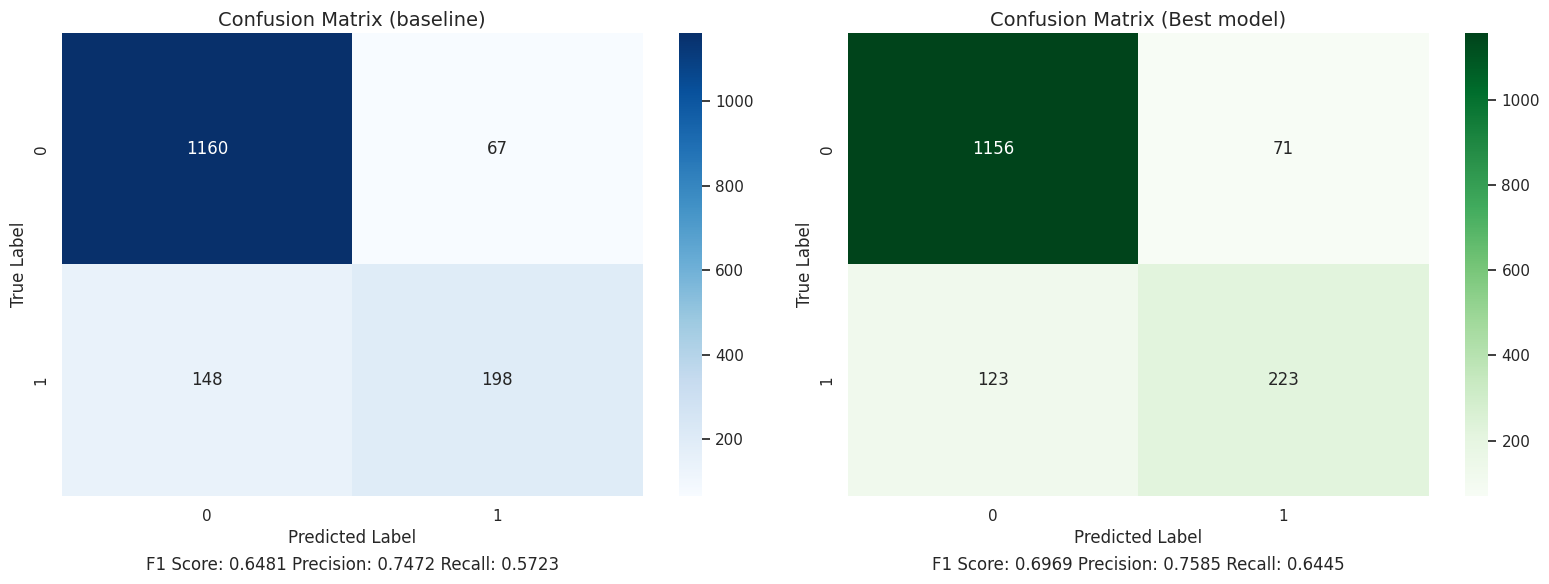

In [52]:
########################## 문제 4-1 ##########################
########################## 코드 작성 ##########################

# baseline model
cm1 = confusion_matrix(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1)
precision_1 = precision_score(y_test, y_pred1)
recall_1 = recall_score(y_test, y_pred1)

# best model
cm2 = confusion_matrix(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)
precision_2 = precision_score(y_test, y_pred2)
recall_2 = recall_score(y_test, y_pred2)

# 그래프 그리기
# 1행 2열의 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 첫 번째 subplot: baseline model
sns.heatmap(cm1, annot=True, fmt='g', ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix (baseline)', fontsize=14)
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].text(0.5, -0.15, f'F1 Score: {f1_1:.4f} Precision: {precision_1:.4f} Recall: {recall_1:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes,
             fontsize=12)

# 두 번째 subplot : Best model
sns.heatmap(cm2, annot=True, fmt='g', ax=axes[1], cmap='Greens')
axes[1].set_title('Confusion Matrix (Best model)', fontsize=14)
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].text(0.5,-0.15, f'F1 Score: {f1_2:.4f} Precision: {precision_2:.4f} Recall: {recall_2:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes,
             fontsize=12)

# subplot 간 간격 조절
plt.tight_layout()
plt.show()
####################################


### 문제 4-2
baseline과 bset_model에 대한 ROC Curve와 AUROC를 구하고, 두 모델의 ROC Curve를 시각화하시오.

\

---

*조건*
1. 두 모델의 ROC Curve (line)를 비교할 수 있도록 **하나의 그래프**에 시각화해야 합니다.
2. plot의 legend 안에 각 모델의 AUROC score를 출력하시오. (예시, Best model (area = 0.833))



---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.
* 힌트) model**.predict_proba**를 사용


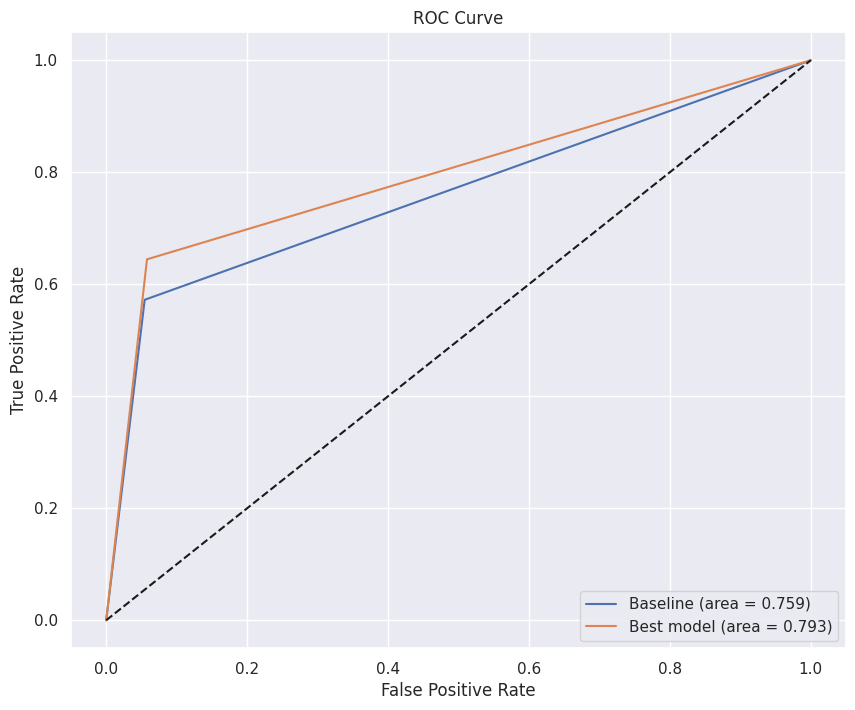

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

########################## 문제 4-2 ##########################
########################## 코드 작성 ##########################
import matplotlib.pyplot as plt

# ROC Curve를 계산합니다.
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1)  # baseline 모델의 FPR, TPR 계산
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2)  # 최적화된 모델의 FPR, TPR 계산

# AUROC 점수를 계산합니다.
auroc1 = roc_auc_score(y_test, y_pred1)  # baseline 모델의 AUROC 점수
auroc2 = roc_auc_score(y_test, y_pred2)  # 최적화된 모델의 AUROC 점수

# ROC Curve를 시각화합니다.
plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, label=f'Baseline (area = {auroc1:.3f})')  # baseline 모델의 ROC Curve
plt.plot(fpr2, tpr2, label=f'Best model (area = {auroc2:.3f})')  # 최적화된 모델의 ROC Curve


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# AUROC
############################################################